In [1]:
import numpy as np
import xarray
%matplotlib inline

# Create dummy data

### The coordinates

In [2]:
D    = 27.0
nx   = 1
ny   = 100
nz   = 100
nt   = 10

In [3]:
x_1d = xarray.Daanp.zeros((nx)) + 2.0*D
y_1d = np.linspace(-100.0,100.0,ny)
z_1d = np.linspace(0.0,150.0,nz)
t_1d = np.linspace(1.0,10.0,nt)

### The velocities

In [4]:
U = np.zeros((nt,nx,ny,nz)) + 8.0 + np.random.random(nt*nx*ny*nz).reshape((nt,nx,ny,nz))
V = np.zeros((nt,nx,ny,nz)) + 0.0 + np.random.random(nt*nx*ny*nz).reshape((nt,nx,ny,nz))
W = np.zeros((nt,nx,ny,nz)) + 0.0 + (np.random.random(nt*nx*ny*nz)/10.0).reshape((nt,nx,ny,nz))

In [5]:
print("Shape of U is {0}".format(U.shape))
print("Shape of V is {0}".format(V.shape))
print("Shape of W is {0}".format(W.shape))

Shape of U is (10, 1, 100, 100)
Shape of V is (10, 1, 100, 100)
Shape of W is (10, 1, 100, 100)


# Use xarray to create DataArrays, then Dataset

In [6]:
U = xarray.DataArray(data=U, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="U",
                     attrs={"long_name":"streamwise wind component","units":"m/s"})

In [7]:
V = xarray.DataArray(data=V, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="V",
                     attrs={"long_name":"cross-stream wind component","units":"m/s"})

In [8]:
W = xarray.DataArray(data=W, 
                     dims=("t","x","y","z"), 
                     coords={"t":t_1d,"x":x_1d,"y":y_1d,"z":z_1d}, 
                     name="W",
                     attrs={"long_name":"vertical wind component","units":"m/s"})

In [9]:
dataset = xarray.Dataset(data_vars={"U":U,"V":V,"W":W})

In [10]:
print(dataset)

<xarray.Dataset>
Dimensions:  (t: 10, x: 1, y: 100, z: 100)
Coordinates:
  * y        (y) float64 -100.0 -97.98 -95.96 -93.94 -91.92 -89.9 -87.88 ...
  * x        (x) float64 54.0
  * z        (z) float64 0.0 1.515 3.03 4.545 6.061 7.576 9.091 10.61 12.12 ...
  * t        (t) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    U        (t, x, y, z) float64 8.073 8.498 8.916 8.993 8.229 8.755 8.887 ...
    W        (t, x, y, z) float64 0.07344 0.06216 0.01418 0.0677 0.0093 ...
    V        (t, x, y, z) float64 0.2714 0.4431 0.9744 0.07633 0.5931 0.4385 ...


# See what it looks like

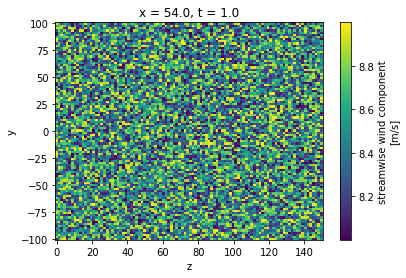

In [11]:
xarray.plot.pcolormesh(U.loc[t_1d[0],x_1d[0],:,:])

# Save as NetCDF

In [12]:
dataset.to_netcdf(path="../file_templates/template_181008_uvw_2D.nc",mode='w')